In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
plt.style.use('seaborn-talk')

In [2]:
# conc metrics data
qhw_rst = pd.read_csv("../data/conc_data_1qhw_Ne2_nsubs_5e2_0_500.csv")
pek_rst = pd.read_csv("../data/conc_data_1pek_Ne2_nsubs_5e2_0_500.csv")
ppn_rst = pd.read_csv("../data/conc_data_2ppn_Ne2_nsubs_5e2_0_500.csv")


In [3]:
# label sites as buried or exposed based on RSA
qhw_rst["loc"] = np.where(qhw_rst['RSA']<=0.05, 'buried', 'exposed')
ppn_rst["loc"] = np.where(ppn_rst['RSA']<=0.05, 'buried', 'exposed')
pek_rst["loc"] = np.where(pek_rst['RSA']<=0.05, 'buried', 'exposed')

In [4]:
from scipy.stats import ttest_ind

qhw_stokes     = qhw_rst[qhw_rst["M_SLR"] > 0]
qhw_antistokes = qhw_rst[qhw_rst["M_SLR"] < 0]

pek_stokes     = pek_rst[pek_rst["M_SLR"] > 0]
pek_antistokes = pek_rst[pek_rst["M_SLR"] < 0]

ppn_stokes     = ppn_rst[ppn_rst["M_SLR"] > 0]
ppn_antistokes = ppn_rst[ppn_rst["M_SLR"] < 0]

print('rate of change (M_SLR): 1qhw')
print(ttest_ind(qhw_stokes["rate of change (M_SLR)"], qhw_antistokes["rate of change (M_SLR)"], nan_policy = 'omit', equal_var = False))
print(np.mean(qhw_stokes["rate of change (M_SLR)"]) - np.mean(qhw_antistokes["rate of change (M_SLR)"]))

print('speed change (M_SLR): 1pek')
print(ttest_ind(pek_stokes["rate of change (M_SLR)"], pek_antistokes["rate of change (M_SLR)"], nan_policy = 'omit', equal_var = False))
print(np.mean(pek_stokes["rate of change (M_SLR)"]) - np.mean(pek_antistokes["rate of change (M_SLR)"]))

print('speed change (M_SLR): 2ppn')
print(ttest_ind(ppn_stokes["rate of change (M_SLR)"], ppn_antistokes["rate of change (M_SLR)"], nan_policy = 'omit', equal_var = False))
print(np.mean(ppn_stokes["rate of change (M_SLR)"]) - np.mean(ppn_antistokes["rate of change (M_SLR)"]))

rate of change (M_SLR): 1qhw
Ttest_indResult(statistic=-0.6016777897046608, pvalue=0.5473927717031459)
-1.6908646447683587e-06
speed change (M_SLR): 1pek
Ttest_indResult(statistic=0.5526117446287062, pvalue=0.5805314428983697)
1.2840749550262987e-06
speed change (M_SLR): 2ppn
Ttest_indResult(statistic=-0.5445794040207762, pvalue=0.5860449143843423)
-1.8260999929603255e-06


In [5]:
from scipy.stats import ttest_ind

qhw_stokes     = qhw_rst[qhw_rst["M_AMI"] > 0]
qhw_antistokes = qhw_rst[qhw_rst["M_AMI"] < 0]

pek_stokes     = pek_rst[pek_rst["M_AMI"] > 0]
pek_antistokes = pek_rst[pek_rst["M_AMI"] < 0]

ppn_stokes     = ppn_rst[ppn_rst["M_AMI"] > 0]
ppn_antistokes = ppn_rst[ppn_rst["M_AMI"] < 0]

print('rate of change (M_AMI):1qhw')
print(ttest_ind(qhw_stokes["rate of change (M_AMI)"], qhw_antistokes["rate of change (M_AMI)"], nan_policy = 'omit', equal_var = False))
print(np.mean(qhw_stokes["rate of change (M_AMI)"]) - np.mean(qhw_antistokes["rate of change (M_AMI)"]))

print('rate of change (M_AMI): 1pek')
print(ttest_ind(pek_stokes["rate of change (M_AMI)"], pek_antistokes["rate of change (M_AMI)"], nan_policy = 'omit', equal_var = False))
print(np.mean(pek_stokes["rate of change (M_AMI)"]) - np.mean(pek_antistokes["rate of change (M_AMI)"]))

print('rate of change (M_AMI): 2ppn')
print(ttest_ind(ppn_stokes["rate of change (M_AMI)"], ppn_antistokes["rate of change (M_AMI)"], nan_policy = 'omit', equal_var = False))
print(np.mean(ppn_stokes["rate of change (M_AMI)"]) - np.mean(ppn_antistokes["rate of change (M_AMI)"]))

rate of change (M_AMI):1qhw
Ttest_indResult(statistic=-0.4895866562526024, pvalue=0.6244294567905684)
-1.251016580662879e-06
rate of change (M_AMI): 1pek
Ttest_indResult(statistic=1.019800572049715, pvalue=0.3078280449832202)
2.3449498815459307e-06
rate of change (M_AMI): 2ppn
Ttest_indResult(statistic=-0.818814718583403, pvalue=0.4128957354018954)
-2.2370636818406383e-06


Text(0.5, 1.0, '1pek')

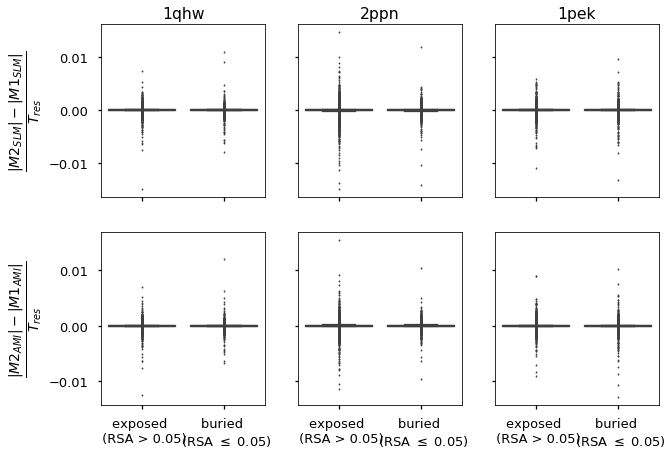

In [6]:
f, (ax1, ax2) = plt.subplots(2, 3, sharex = True, sharey = 'row', figsize = (10, 7))

#slope
g = sns.boxplot(x="loc", y="rate of change (M_SLR)", data=qhw_rst, ax = ax1[0], order=["exposed", "buried"], fliersize = 1)
g = sns.boxplot(x="loc", y="rate of change (M_SLR)", data=ppn_rst, ax = ax1[1], order=["exposed", "buried"], fliersize = 1)
g = sns.boxplot(x="loc", y="rate of change (M_SLR)", data=pek_rst, ax = ax1[2], order=["exposed", "buried"], fliersize = 1)

#slope
g = sns.boxplot(x="loc", y="rate of change (M_AMI)", data=qhw_rst, ax = ax2[0], order=["exposed", "buried"], fliersize = 1)
g = sns.boxplot(x="loc", y="rate of change (M_AMI)", data=ppn_rst, ax = ax2[1], order=["exposed", "buried"], fliersize = 1)
g = sns.boxplot(x="loc", y="rate of change (M_AMI)", data=pek_rst, ax = ax2[2], order=["exposed", "buried"], fliersize = 1)

plt.xticks([0,1], ['exposed \n (RSA > 0.05)','buried \n (RSA $\leq$ 0.05)'])

for a in [ax1,ax2]:
    for i in range(3):
        a[i].set_xlabel("")
        a[i].set_ylabel("")
        
# y labels
ax1[0].set_ylabel(r"$\frac{|M2_{SLM}| - |M1_{SLM}|}{T_{res}}$", fontsize = 20)
ax2[0].set_ylabel(r"$\frac{|M2_{AMI}| - |M1_{AMI}|}{T_{res}}$", fontsize = 20)

# set title
ax1[0].set_title("1qhw")
ax1[1].set_title("2ppn")
ax1[2].set_title("1pek")



In [7]:
qhw_exposed = qhw_rst[qhw_rst["loc"] == "exposed"]
qhw_buried  = qhw_rst[qhw_rst["loc"] == "buried"]

pek_exposed = pek_rst[pek_rst["loc"] == "exposed"]
pek_buried  = pek_rst[pek_rst["loc"] == "buried"]

ppn_exposed = ppn_rst[ppn_rst["loc"] == "exposed"]
ppn_buried  = ppn_rst[ppn_rst["loc"] == "buried"]

print('rate of change (M_SLR):: 1qhw')
print(ttest_ind(qhw_exposed["rate of change (M_SLR)"], qhw_buried["rate of change (M_SLR)"], nan_policy = 'omit', equal_var = False))
print(np.mean(qhw_exposed["rate of change (M_SLR)"]) - np.mean(qhw_buried["rate of change (M_SLR)"]))

print('rate of change (M_SLR): 1pek')
print(ttest_ind(pek_exposed["rate of change (M_SLR)"], pek_buried["rate of change (M_SLR)"], nan_policy = 'omit', equal_var = False))
print(np.mean(pek_exposed["rate of change (M_SLR)"]) - np.mean(pek_buried["rate of change (M_SLR)"]))

print('rate of change (M_SLR): 2ppn')
print(ttest_ind(ppn_exposed["rate of change (M_SLR)"], ppn_buried["rate of change (M_SLR)"], nan_policy = 'omit', equal_var = False))
print(np.mean(ppn_exposed["rate of change (M_SLR)"]) - np.mean(ppn_buried["rate of change (M_SLR)"]))


print('\n\n rate of change (M_AMI): 1qhw')
print(ttest_ind(qhw_exposed["rate of change (M_AMI)"], qhw_buried["rate of change (M_AMI)"], nan_policy = 'omit', equal_var = False))
print(np.mean(qhw_exposed["rate of change (M_AMI)"]) - np.mean(qhw_buried["rate of change (M_AMI)"]))

print('rate of change (M_AMI): 1pek')
print(ttest_ind(pek_exposed["rate of change (M_AMI)"], pek_buried["rate of change (M_AMI)"], nan_policy = 'omit', equal_var = False))
print(np.mean(pek_exposed["rate of change (M_AMI)"]) - np.mean(pek_buried["rate of change (M_AMI)"]))

print('rate of change (M_AMI): 2ppn')
print(ttest_ind(ppn_exposed["rate of change (M_AMI)"], ppn_buried["rate of change (M_AMI)"], nan_policy = 'omit', equal_var = False))
print(np.mean(ppn_exposed["rate of change (M_AMI)"]) - np.mean(ppn_buried["rate of change (M_AMI)"]))

rate of change (M_SLR):: 1qhw
Ttest_indResult(statistic=0.8639106722214575, pvalue=0.3876517092564098)
3.078736633125493e-06
rate of change (M_SLR): 1pek
Ttest_indResult(statistic=0.35735573592201897, pvalue=0.720828463381809)
1.0242262861429014e-06
rate of change (M_SLR): 2ppn
Ttest_indResult(statistic=-0.9280612189413643, pvalue=0.35339837319346656)
-4.9060915682982575e-06


 rate of change (M_AMI): 1qhw
Ttest_indResult(statistic=-0.037013396396902175, pvalue=0.9704748518649977)
-1.2189468802479377e-07
rate of change (M_AMI): 1pek
Ttest_indResult(statistic=1.3722439092647674, pvalue=0.16999987902615632)
3.855473363284601e-06
rate of change (M_AMI): 2ppn
Ttest_indResult(statistic=-0.5515737966564683, pvalue=0.581252738292376)
-2.344163390420303e-06
